In [1]:
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# from fa2 import ForceAtlas2

In [29]:
def makeGraph(G, file, size, threshold, pos, seed=0, iterations=0, kfactor=0):
    # clear the graph
    G.clear()
    # define the couplings
    var = {0: r'$n_{jet}$', 1: r'$p_T^{b_1}$', 2: r'$p_T^{\gamma_1}$', 3: r'$p_T^{\gamma_2}$', 4: r'$p_T^{\gamma\gamma}$',
           5: r'$m_{bb}$', 6: r'$m_{\gamma\gamma}$', 7: r'$m_{b_1h}$', 8: r'$m_{bbh}$',
           9: r'$H_T$', 10: r'$\delta R_{b\gamma_1}$', 11: r'$\delta\phi_{b\gamma_1}$'}

    # Import the correlation matrix
    corr = np.loadtxt(file)

    for i in range(0,size):
        for j in range(i,size):
            if corr[i,j] != corr[j,i]:
                raise ValueError('Correlation matrix is not symmetric in: ', i, j)

    # add weight to the edges
    for i in range(0,size):
        for j in range(i+1,size):
            G.add_edge(i,j,weight=math.exp(np.abs(corr[i,j])), sign=np.sign(corr[i,j]))

    # node layouts
    if not pos or len(pos) < size:
        if pos:
            print("positions of nodes need to be recomputed since input position array is smaller")
        pos = nx.fruchterman_reingold_layout(G, iterations=iterations, k=kfactor, threshold=1e-16, weight='weight', seed=seed)

    # define correlation maps with edge positions
    epos0 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(0.2) <= d['weight'] < math.exp(threshold) and d['sign'] == 1.]
    epos1 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(threshold) <= d['weight'] < math.exp(0.6) and d['sign'] == 1.]
    epos2 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(0.6) <= d['weight'] < math.exp(0.8) and d['sign'] == 1.]
    epos3 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(0.8) <= d['weight'] < math.exp(1.) and d['sign'] == 1.]
    eneg0 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(0.2) <= d['weight'] < math.exp(threshold) and d['sign'] == -1.]
    eneg1 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(threshold) <= d['weight'] < math.exp(0.6) and d['sign'] == -1.]
    eneg2 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(0.6) <= d['weight'] < math.exp(0.8) and d['sign'] == -1.]
    eneg3 = [(u, v) for (u, v, d) in G.edges(data=True) if math.exp(0.8) <= d['weight'] < math.exp(1.) and d['sign'] == -1.]

    # draw nodes
    nodesize = 8000
    nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], alpha=1, node_color='#abcfdb', node_size=nodesize,
                               edgecolors='#3f7f93', linewidths=5)

    # edges weighting and drawing
    nx.draw_networkx_edges(G, pos, edgelist=epos0, width=3, alpha=0.1, edge_color='#5b5f6d')  # gray
    nx.draw_networkx_edges(G, pos, edgelist=epos1, width=6, alpha=0.9, edge_color='#b48eae', connectionstyle='Arc3, rad=10')  # purple
    nx.draw_networkx_edges(G, pos, edgelist=epos2, width=8, alpha=0.9, edge_color='#a53860', connectionstyle='Arc3, rad=10')  # red
    nx.draw_networkx_edges(G, pos, edgelist=epos3, width=10, alpha=1, edge_color='#4e6e58', connectionstyle='Arc3, rad=10')  # green
    nx.draw_networkx_edges(G, pos, edgelist=eneg0, width=3, alpha=0.1, edge_color='#5b5f6d', style='dashed')  # gray
    nx.draw_networkx_edges(G, pos, edgelist=eneg1, width=6, alpha=0.9, edge_color='#b48eae', style='dashed')  # purple
    nx.draw_networkx_edges(G, pos, edgelist=eneg2, width=10, alpha=0.9, edge_color='#a53860', style='dashed')  # red
    nx.draw_networkx_edges(G, pos, edgelist=eneg3, width=12, alpha=1, edge_color='#4e6e58', style='dashed')  # green

    # labels
    plt.rc('text', usetex=True)
    nx.draw_networkx_labels(G, pos, labels=var, font_size=38, font_weight='900')

    return pos


def makeEdgeLegend(plt, pos, size=70):
    plt.rc('text', usetex=True)
    line0 = Line2D([0], [0], color='#5b5f6d', alpha=0.2, linewidth=8, linestyle='', marker='s', markersize=size)
    line1 = Line2D([0], [0], color='#b48eae', linewidth=8, linestyle='', marker='s', markersize=size)
    line2 = Line2D([0], [0], color='#a53860', linewidth=12, linestyle='', marker='s', markersize=size)
    line3 = Line2D([0], [0], color='#4e6e58', linewidth=16, linestyle='', marker='s', markersize=size)
    lineneg = Line2D([0], [0], color='black', linewidth=6, linestyle='dashed')
    linepos = Line2D([0], [0], color='black', linewidth=6, linestyle='-')
    labels = [r'$0.2 \leq |\rho| < 0.4$', r'$0.4 \leq |\rho| < 0.6$', r'$0.6 \leq |\rho| < 0.8$', r'$0.8 \leq |\rho| < 1.0$']
    labelsign = [r'$-\rho$', r'$+\rho$']
    plt.figlegend(handles=[line0, line1, line2, line3], labels=labels, handlelength=0.5, columnspacing=1.5, bbox_to_anchor=(0.5, 0.05), loc='lower center', prop={'size': size}, ncol=4, frameon=True)
    plt.figlegend(handles=[lineneg, linepos], labels=labelsign, bbox_to_anchor=(0.5, pos), loc='lower center', prop={'size': size}, ncol=2, frameon=True)

def makeNodeLegend(plt, posh, posv, size=70):
    plt.rc('text', usetex=True)
    plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
    circ0 = Line2D([0], [0], color='#99bde0', linestyle='', marker='o', markersize=45)  # blue
    circ1 = Line2D([0], [0], color='#ffc1cb', linestyle='', marker='o', markersize=45)  # pink
    circ2 = Line2D([0], [0], color='#cdcd00', linestyle='', marker='o', markersize=45)  # yellow
    circ3 = Line2D([0], [0], color='#cdcd00', alpha=0.3, linestyle='', marker='o', markersize=45)  # yellow
    labels = [r'$Higgs$', r'$aTGC$', r'$EW$', r'$EW=0$']
    plt.figlegend(handles=[circ0, circ1, circ2, circ3], labels=labels, labelspacing=0.25, handlelength=0.4, bbox_to_anchor=(posh, posv), borderpad=0.35,
                  loc='lower center', prop={'size': size}, ncol=1, frameon=True)

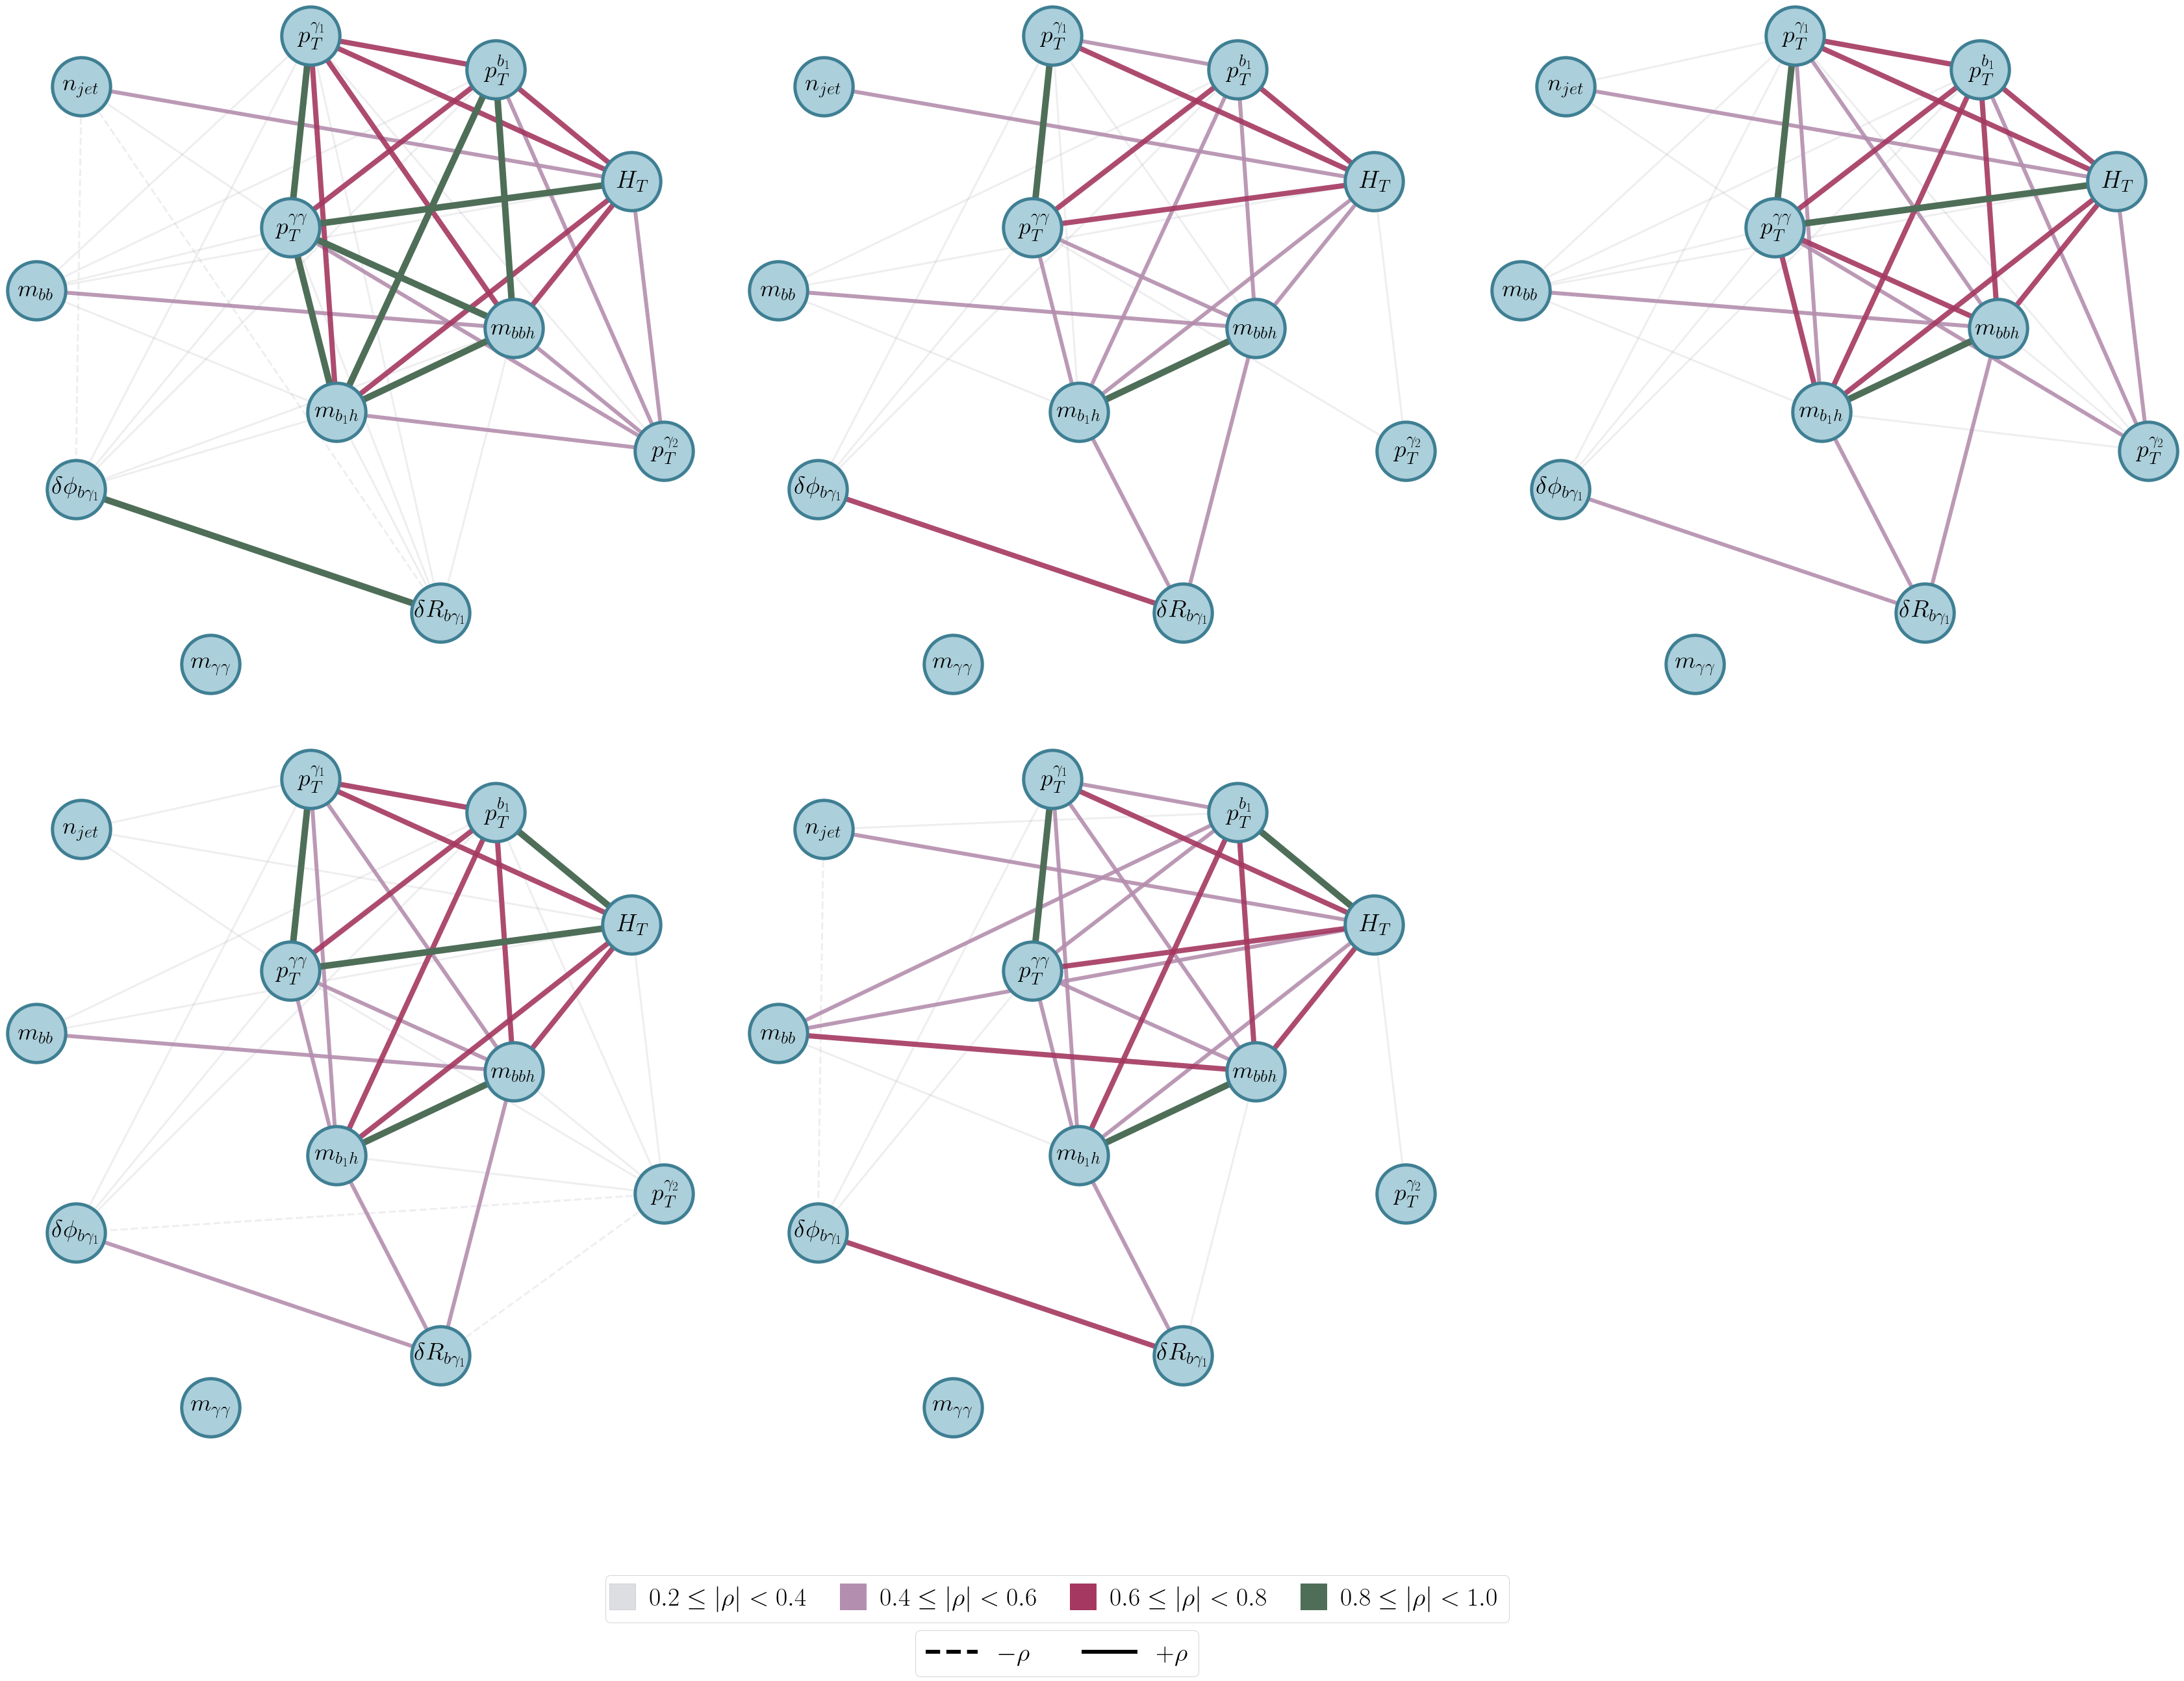

In [37]:
# make the graphs here
# setting
font = {'family': 'serif',
        'color':  '#34495E',
        'weight': 'heavy',
        'size': 55
        }
bbox_props = dict(boxstyle="round", fc="w", ec="none", alpha=0.9)

# initialize the graph
G = nx.Graph()
threshold = 0.4

# plt.figure()
# pos = []
# pos = makeGraph(G, file='Correlations/guide.txt', size=14, threshold=threshold, pos=pos, seed=5, iterations=600, kfactor=5)

plt.figure(figsize=(60,42))
plt.subplots_adjust(bottom=0.15, wspace=0.075, hspace=0.075)
name='../plots/networks.png'

# fourth graph
plt.subplot(2,3,1)
plt.axis('off')
pos = []
pos = makeGraph(G, file='Correlations/zh.txt', size=12, threshold=threshold, pos=pos, seed=5, iterations=1235, kfactor=0.527)
# plt.text(1.25, 0., r'$Zh$', ha="center", va="center", size=40, fontdict=font, bbox=bbox_props, rotation=-90)

# third graph
plt.subplot(2,3,2)
plt.axis('off')
pos = makeGraph(G, file='Correlations/yb2.txt', size=12, threshold=threshold, pos=pos)
# plt.text(-1.25, 0., r'$y_b^2$', ha="center", va="center", size=40, fontdict=font, bbox=bbox_props, rotation=90)

# third graph
plt.subplot(2,3,3)
plt.axis('off')
pos = makeGraph(G, file='Correlations/yt2.txt', size=12, threshold=threshold, pos=pos)
# plt.text(1.25, 0., r'$y_t^2$', ha="center", va="center", size=40, fontdict=font, bbox=bbox_props, rotation=-90)

# third graph
plt.subplot(2,3,4)
plt.axis('off')
pos = makeGraph(G, file='Correlations/ybyt.txt', size=12, threshold=threshold, pos=pos)
# plt.text(1.25, 0., r'$y_by_t$', ha="center", va="center", size=40, fontdict=font, bbox=bbox_props, rotation=-90)

# third graph
plt.subplot(2,3,5)
plt.axis('off')
pos = makeGraph(G, file='Correlations/bbxaa.txt', size=12, threshold=threshold, pos=pos)
# plt.text(1.25, 0., r'$b\bar{b}\gamma\gamma$', ha="center", va="center", size=40, fontdict=font, bbox=bbox_props, rotation=-90)

# legend
makeEdgeLegend(plt, 0.0225, 40)
# makeNodeLegend(plt, 0.92, 0.42,40)

# plt.rc('text', usetex=False)
# plt.text(-2.5, 4., r'Correlations between the quark and lepton sector', ha="center", va="center", size=50, fontdict=font, bbox=bbox_props)

# plotting
plt.savefig(name, dpi=300)
plt.show(block=False)
plt.close('all')